<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Supervised-and-Unsupervised-Learning/blob/main/Multiple%20Output%20Model%20%7C%20Regression%20%26%20Classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Output Models using the Functional API

We are going to use the Keras functional API to train a model to predict two outputs.

The goal is to  predict:
- the wine quality, and
- whether the wine is red or white

## Import Libs

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools


## Load Data

In [4]:
# URL of the red wine dataset
URI = './winequality.csv'
# load the dataset from the URL
df = pd.read_csv(URI, sep=",")
df.head(2)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [5]:
df.shape

(5320, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'is_red'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [8]:
# shuffle the data
df = df.iloc[np.random.permutation(len(df))]

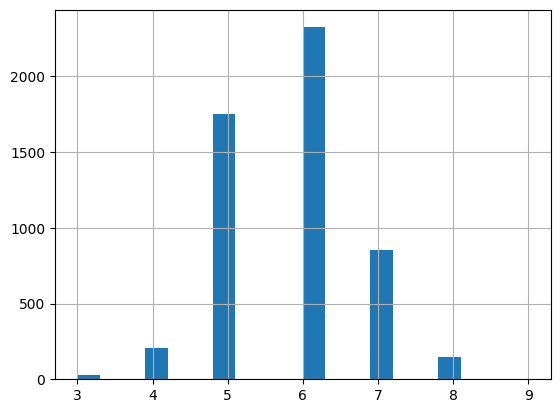

In [10]:

# Distribution of Target Variable
df['quality'].hist(bins=20);

**P.S.**

- The plot indictaes that the wine quality dataset is imbalanced, Since there are very few observations with quality equal to 3, 4, 8 and 9, so we can drop these observations from  dataset.
- This can be done by removing data belonging to all classes except those > 4 and < 8.

In [11]:

# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# reset index and drop the old one
df = df.reset_index(drop=True)

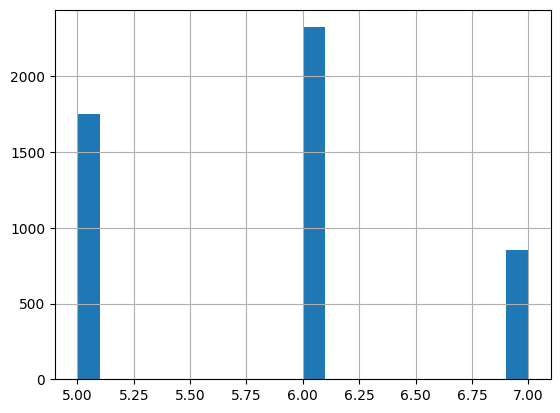

In [12]:
df['quality'].hist(bins=20);

## Split Data

- The data will be split 80:20 into train and test sets.
- The train will also be split 80:20 into train and val sets.

In [13]:

# split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=.20, random_state = 1)

# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=.20, random_state = 1)

**Explore Data**

Here's where we can explore the training stats.
- pop the labels 'is_red' and 'quality' from the data as these will be used as the labels

In [16]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.219635,1.347627,3.80000,6.4000,6.9000,7.7000,15.90000
volatile acidity,3155.0,0.338845,0.162974,0.08000,0.2300,0.2900,0.4000,1.33000
citric acid,3155.0,0.319448,0.144947,0.00000,0.2500,0.3100,0.3900,1.23000
residual sugar,3155.0,5.049017,4.555675,0.60000,1.8000,2.7000,7.5000,65.80000
chlorides,3155.0,0.056780,0.035669,0.00900,0.0380,0.0470,0.0670,0.61100
free sulfur dioxide,3155.0,30.238827,17.286498,1.00000,17.0000,28.0000,41.0000,131.00000
total sulfur dioxide,3155.0,114.248811,55.598133,6.00000,77.0000,117.0000,152.0000,344.00000
density,3155.0,0.994561,0.003031,0.98711,0.9922,0.9947,0.9968,1.03898
pH,3155.0,3.223274,0.159747,2.72000,3.1100,3.2100,3.3200,4.01000
sulphates,3155.0,0.533677,0.148488,0.22000,0.4400,0.5100,0.6000,1.98000


using `format_output` function in order to seprate target features `is_red` and `quality` from the dataset

In [17]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [18]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)

# format the output of the test set
test_Y = format_output(test)

**Data Normalization**

In [19]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [20]:

# normalize the train set
norm_train_X = norm(train)

# normalize the val set
norm_val_X = norm(val)

# normalize the test set
norm_test_X = norm(test)

## Define Model

Define the model using the functional API. The base model will be 2 `Dense` layers of 128 neurons each, and have the `'relu'` activation.

In [21]:
def base_model(inputs):

    # connect a Dense layer with 128 neurons and a relu activation
    x = Dense(128, activation='relu')(inputs)

    # connect another Dense layer with 128 neurons and a relu activation
    x = Dense(128, activation='relu')(x)
    return x


**Define output layers of the model**

You will add output layers to the base model.
- The model will need two outputs.

One output layer will predict wine quality, which is a numeric value.
- Define a `Dense` layer with 1 neuron.
- Since this is a regression output, the activation can be left as its default value `None`.

The other output layer will predict the wine type, which is either red `1` or not red `0` (white).
- Define a `Dense` layer with 1 neuron.
- Since there are two possible categories, you can use a sigmoid activation for binary classification.

Define the `Model`
- Define the `Model` object, and set the following parameters:
  - `inputs`: pass in the inputs to the model as a list.
  - `outputs`: pass in a list of the outputs that you just defined: wine quality, then wine type.


In [22]:
def final_model(inputs):

    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    wine_quality = Dense(units='1', name='wine_quality')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wine_quality,wine_type])

    return model

**Compiling the Model**

 When setting the loss parameter of `model.compile`,we set the loss for each of the two outputs (wine quality and wine type).

To set more than one loss, we use a dictionary of key-value pairs.


- wine_type: Since we will be performing binary classification on wine type, we should use the `binary crossentropy` loss function for it.

- wine_quality: since this is a regression output, we use the mean squared error.

In [24]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms,
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mean_squared_error'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality':  tf.keras.metrics.RootMeanSquaredError()
                       }
             )

## Train Model

In [26]:

history = model.fit(norm_train_X, train_Y,
                    epochs = 50, validation_data=(norm_val_X, val_Y))

Epoch 1/50
99/99 [==============================] - 1s 6ms/step - loss: 4.4713 - wine_quality_loss: 3.8361 - wine_type_loss: 0.6351 - wine_quality_root_mean_squared_error: 1.9586 - wine_type_accuracy: 0.6872 - val_loss: 3.1894 - val_wine_quality_loss: 2.6257 - val_wine_type_loss: 0.5638 - val_wine_quality_root_mean_squared_error: 1.6204 - val_wine_type_accuracy: 0.8238
Epoch 2/50
99/99 [==============================] - 1s 7ms/step - loss: 2.8655 - wine_quality_loss: 2.3780 - wine_type_loss: 0.4875 - wine_quality_root_mean_squared_error: 1.5421 - wine_type_accuracy: 0.8345 - val_loss: 2.5268 - val_wine_quality_loss: 2.1014 - val_wine_type_loss: 0.4254 - val_wine_quality_root_mean_squared_error: 1.4496 - val_wine_type_accuracy: 0.8441
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 2.3585 - wine_quality_loss: 1.9877 - wine_type_loss: 0.3708 - wine_quality_root_mean_squared_error: 1.4098 - wine_type_accuracy: 0.8929 - val_loss: 2.1502 - val_wine_quality_loss: 1.82

In [27]:
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 [==============================] - 0s 3ms/step - loss: 0.3994 - wine_quality_loss: 0.3684 - wine_type_loss: 0.0310 - wine_quality_root_mean_squared_error: 0.6069 - wine_type_accuracy: 0.9937

loss: 0.3993673026561737
wine_quality_loss: 0.36837640404701233
wine_type_loss: 0.03099079802632332
wine_quality_rmse: 0.6069402098655701
wine_type_accuracy: 0.9936628937721252


In [28]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

31/31 [==============================] - 0s 4ms/step


In [29]:
print(quality_pred[0])
print(type_pred[0])

[5.2184267]
[0.00214638]


## Plot Results

In [30]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(test_Y[1], np.round(type_pred), labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=[0, 1])
    disp.plot(values_format='d');

def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

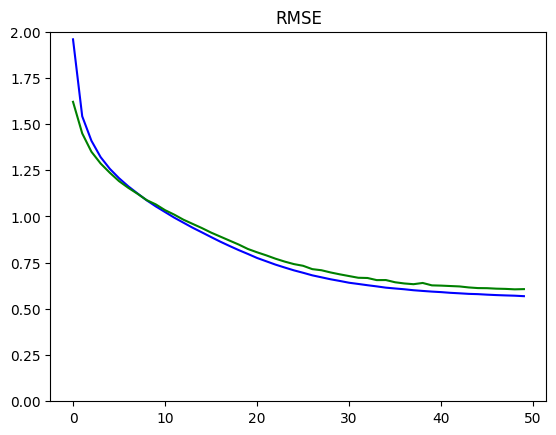

In [31]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

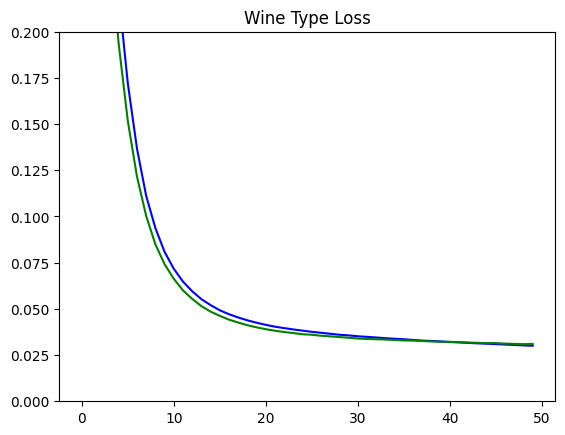

In [32]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

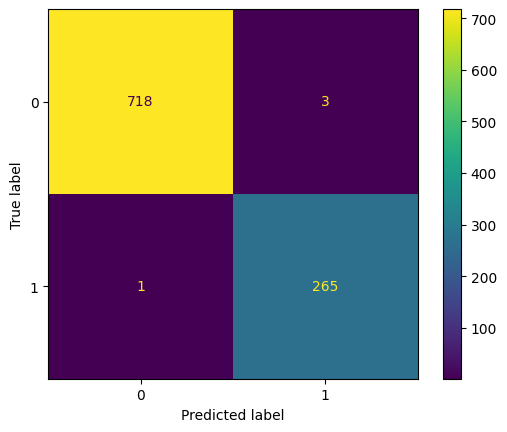

In [33]:
# Plot the confusion matrices for wine type
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

### Refrences

[Custom and Distributed Training with TensorFlow | Coursera](https://www.coursera.org/learn/custom-distributed-training-with-tensorflow)